# Example of correctly formatting data

For use in decoding (see "Examples_decoders_hc" and "Examples_kf_decoder_hc"), we need the following format of inputs:
- Neural data should be a matrix of size "number of time bins" x "number of neurons", where each entry is the firing rate of a given neuron in a given time bin
- The output you are decoding should be a matrix of size "number of time bins" x "number of features you are decoding"

In this example, we load Matlab data that contains 
- The spike times of all neurons. In Matlab, "spike_times" is a cell of size "number of neurons" x 1. Within spike_times{i} is a vector containing all the spike times of neuron i.
- A continuous stream of the output variables. In this example, we are aiming to decode position. In Matlab, "pos" is a matrix of size "number of recorded time points" x 2 (x and y positions were recorded) that contains the x and y position components at all time points. Time points that were not recorded have NaN values. "pos_times" is a vector that states the time at all recorded time points. 

We will put this data in the format described above, with the help of the functions "bin_spikes" and "bin_output" that are in the file "preprocessing_funcs.py"




## Import packages and functions
Note that you may need to specify the path below

In [1]:
###Import standard packages###
import numpy as np
from scipy import io
import sys

###Import functions for binning data for preprocessing###
from Neural_Decoding.preprocessing_funcs import bin_spikes
from Neural_Decoding.preprocessing_funcs import bin_output

from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## Load Data
The data for this example can be downloaded at this [link](https://www.dropbox.com/s/94dhsgnx2cfs3jx/hc_data_raw.mat?dl=0)

It is the hc-2 dataset from [crcns](https://crcns.org/data-sets/hc/hc-2). Specifically, we use the dataset "ec014.333" 

In [2]:
###Load Data###
folder='../crcns/' #ENTER THE FOLDER THAT YOUR DATA IS IN
data=io.loadmat(folder+'hc_data_raw.mat')
spike_times=data['spike_times'] #Load spike times of all neurons
pos=data['pos'] #Load x and y positions
pos_times=data['pos_times'][0] #Load times at which positions were recorded

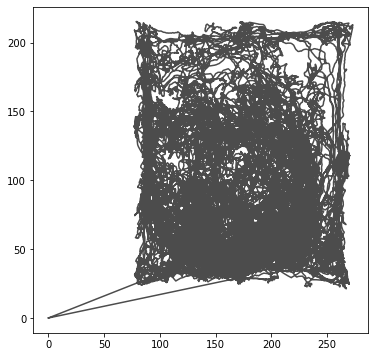

In [3]:
figure = plt.figure(figsize=(6,6))
ax = figure.add_subplot(111)
ax.plot(np.nan_to_num(pos[:,0]),np.nan_to_num(pos[:,1]),'k',alpha=.7)

## User Inputs

In [4]:
dt=.2 #Size of time bins (in seconds)
t_start=pos_times[0] #Time to start extracting data - here the first time position was recorded
t_end=5608 #pos_times[-1] #Time to finish extracting data - when looking through the dataset, the final position was recorded around t=5609, but the final spikes were recorded around t=5608
downsample_factor=1 #Downsampling of output (to make binning go faster). 1 means no downsampling.

## Put data in binned format

In [5]:
#When loading the Matlab cell "spike_times", Python puts it in a format with an extra unnecessary dimension
#First, we will put spike_times in a cleaner format: an array of arrays
spike_times=np.squeeze(spike_times)
for i in range(spike_times.shape[0]):
    spike_times[i]=np.squeeze(spike_times[i])

In [14]:
spike_times[1]

array([4955.0059 , 4955.01545, 5547.2378 ])

In [17]:
pos.shape

(219089, 2)

In [6]:
###Preprocessing to put spikes and output in bins###

#Bin neural data using "bin_spikes" function
neural_data=bin_spikes(spike_times,dt,t_start,t_end)

#Bin output (position) data using "bin_output" function
pos_binned=bin_output(pos,pos_times,dt,t_start,t_end,downsample_factor)

## Save Data

In [27]:
import pickle

data_folder=folder #FOLDER YOU WANT TO SAVE THE DATA TO
# data_folder='/home/jglaser/Data/DecData/' 

with open(data_folder+'example_data_hc.pickle','wb') as f:
    pickle.dump([neural_data,pos_binned],f)